In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime as dt

In [2]:
df = pd.DataFrame()
df_new = pd.DataFrame()
for year in [2019,2020,2021,2022]:
    for semester in [1,2]:
        df = df.append(pd.read_csv(f'Data/ca-{year}-0{semester}.csv', delimiter=';', decimal = ',', encoding = 'utf8'))



C:\Users\cyro.pereira\AppData\Local\Temp\ipykernel_9268\1955530611.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(f'Data/ca-{year}-0{semester}.csv', delimiter=';', decimal = ',', encoding = 'utf8'))
C:\Users\cyro.pereira\AppData\Local\Temp\ipykernel_9268\1955530611.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(f'Data/ca-{year}-0{semester}.csv', delimiter=';', decimal = ',', encoding = 'utf8'))
C:\Users\cyro.pereira\AppData\Local\Temp\ipykernel_9268\1955530611.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(f'Data/ca-{year}-0{semester}.csv', delimiter=';', decimal = ',', encoding = 'utf8'))
C:\Users\cyro.pereira\AppData\Local\Temp

In [3]:
display(df.head())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,03/01/2019,4.199,3.5766,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,03/01/2019,2.899,2.3513,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL S10,03/01/2019,3.349,2.8841,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GNV,03/01/2019,2.439,NaN,R$ / m³,PETROBRAS DISTRIBUIDORA S.A.
4,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,NaN,CENTRO,92310-000,GASOLINA,02/01/2019,4.399,3.8550,R$ / litro,BRANCA


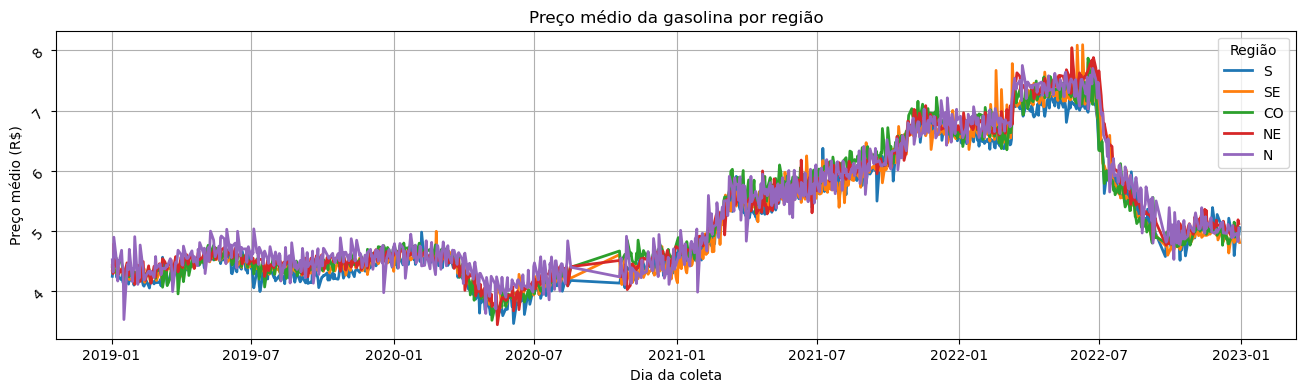

In [4]:
plt.figure(figsize = (16,4))
for regiao in ['S', 'SE', 'CO', 'NE', 'N']:
  # Selecionar o tipo de combustível
  for tipo in ['GASOLINA']:  #  'ETANOL', 'GNV', 'DIESEL', 'DIESEL S10' 

    # Cria um dataframe temporário com os dados do tipo de combustível selecionado
    df_temp = df.loc[(df['Produto'] == tipo)&(df['Regiao - Sigla'] == regiao)]

    date_format = '%d/%m/%Y'

    date_time = []
    for date in df_temp['Data da Coleta']:
      date_time.append(dt.strptime(date, date_format))

    # Calcula o valor médio do combustível por dia
    meanval = []
    for date in df_temp['Data da Coleta'].unique():
      meanval.append(df_temp.loc[df_temp['Data da Coleta'] == date]['Valor de Venda'].mean())
    
    # Cria um vetor com os dias únicos
    date_time_unique = []
    for date in df_temp['Data da Coleta'].unique():
      date_time_unique.append(dt.strptime(date, date_format))
    # cria um dataframe contendo os dia únicos e os valores médios, colocando os dias em ordem crescente
    df_new = pd.DataFrame({'Data da Coleta': date_time_unique, 'Valor de Venda': meanval})
    df_new = df_new.sort_values(by=['Data da Coleta'])
    # coloca a data como index
    df_new = df_new.set_index('Data da Coleta')

    
    plt.plot(df_new, lw = 2, label = regiao)
plt.legend(title = 'Região')
plt.grid()
plt.title('Preço médio da gasolina por região')
plt.xlabel('Dia da coleta')
plt.ylabel('Preço médio (R$)')
plt.yticks(rotation = 45)
plt.show()


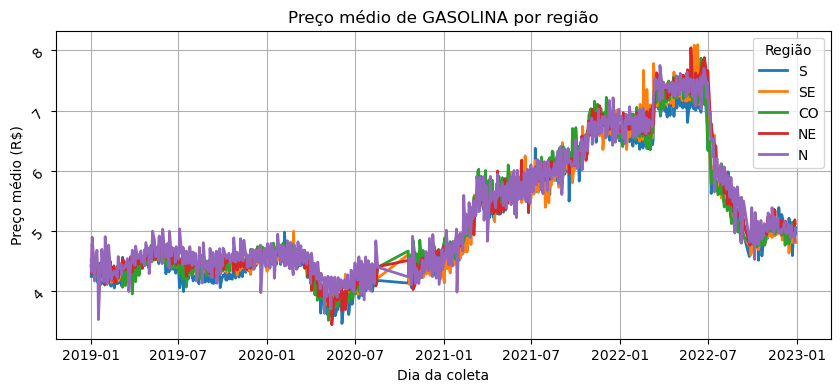

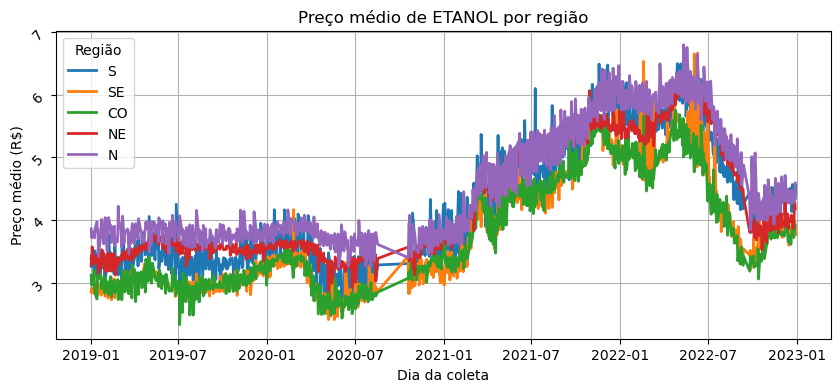

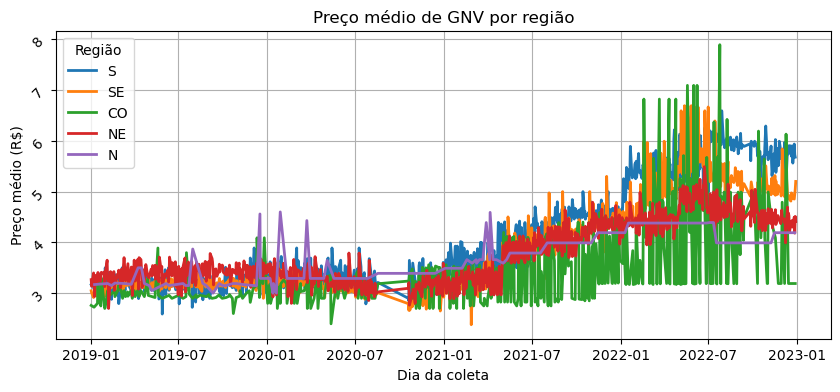

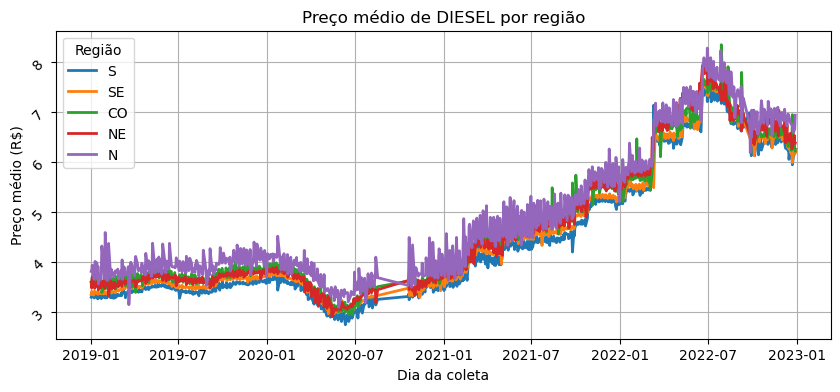

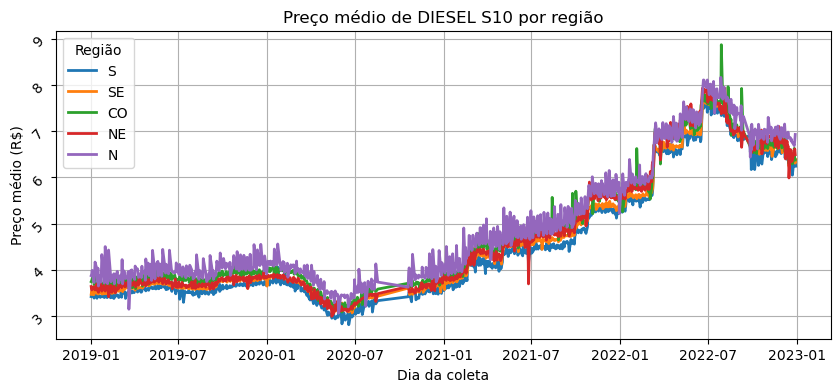

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt

# Supondo que você já tenha carregado seu DataFrame df

# Lista de produtos
produtos = ['GASOLINA', 'ETANOL', 'GNV', 'DIESEL', 'DIESEL S10']

# Loop sobre os produtos
for tipo in produtos:
    plt.figure(figsize=(10, 4))
    
    for regiao in ['S', 'SE', 'CO', 'NE', 'N']:
        # Cria um dataframe temporário com os dados do tipo de combustível selecionado e da região atual
        df_temp = df.loc[(df['Produto'] == tipo) & (df['Regiao - Sigla'] == regiao)]

        date_format = '%d/%m/%Y'

        date_time = [dt.strptime(date, date_format) for date in df_temp['Data da Coleta']]

        # Calcula o valor médio do combustível por dia
        meanval = [df_temp.loc[df_temp['Data da Coleta'] == date]['Valor de Venda'].mean() for date in df_temp['Data da Coleta'].unique()]

        # Cria um vetor com os dias únicos
        date_time_unique = [dt.strptime(date, date_format) for date in df_temp['Data da Coleta'].unique()]

        # Cria um dataframe contendo os dias únicos e os valores médios, colocando os dias em ordem crescente
        df_new = pd.DataFrame({'Data da Coleta': date_time_unique, 'Valor de Venda': meanval})
        df_new = df_new.sort_values(by=['Data da Coleta'])
        # Coloca a data como index
        df_new = df_new.set_index('Data da Coleta')

        plt.plot(df_new, lw=2, label=regiao)

    plt.legend(title='Região')
    plt.grid()
    plt.title(f'Preço médio de {tipo} por região')
    plt.xlabel('Dia da coleta')
    plt.ylabel('Preço médio (R$)')
    plt.yticks(rotation=45)
    plt.show()


In [6]:
import pandas as pd

# Supondo que você tenha um DataFrame df com os dados

# Lista de produtos
produtos = ['GASOLINA', 'ETANOL', 'GNV', 'DIESEL', 'DIESEL S10']

# Dicionário para armazenar DataFrames separados por produto
resultados_por_produto = {}

# Loop sobre os produtos
for tipo in produtos:
    # Criar um DataFrame separado para o produto atual
    df_produto = df[df['Produto'] == tipo]

    # Agrupar por região
    df_regioes = df_produto.groupby('Regiao - Sigla')['Valor de Venda']

    # Calcular estatísticas manualmente e arredondar para 2 casas decimais
    estatisticas = df_regioes.agg(['mean', 'max', 'min', 'var', 'std', 'count']).round(2)

    # Renomear as colunas
    estatisticas.columns = ['Média', 'Máximo', 'Mínimo', 'Variância', 'Desvio Padrão', 'Quantidade de Dados']

    # Adicionar uma coluna para o tipo de produto
    estatisticas['Produto'] = tipo

    # Armazenar o DataFrame no dicionário
    resultados_por_produto[tipo] = estatisticas

# Exibir os DataFrames finais
for tipo, resultado in resultados_por_produto.items():
    print(f"\nEstatísticas para {tipo}:\n")
    print(resultado)





Estatísticas para GASOLINA:

                Média  Máximo  Mínimo  Variância  Desvio Padrão  \
Regiao - Sigla                                                    
CO               5.21    8.11    3.28       1.19           1.09   
N                5.27    8.75    2.87       1.25           1.12   
NE               5.24    8.94    3.16       1.25           1.12   
S                5.08    8.28    3.10       1.15           1.07   
SE               5.13    8.99    2.92       1.16           1.08   

                Quantidade de Dados   Produto  
Regiao - Sigla                                 
CO                            84812  GASOLINA  
N                             63931  GASOLINA  
NE                           186085  GASOLINA  
S                            160818  GASOLINA  
SE                           456716  GASOLINA  

Estatísticas para ETANOL:

                Média  Máximo  Mínimo  Variância  Desvio Padrão  \
Regiao - Sigla                                                    
CO

In [7]:
import pandas as pd

# Supondo que você tenha um DataFrame df com os dados

# Lista de produtos
produtos = ['GASOLINA', 'ETANOL', 'GNV', 'DIESEL', 'DIESEL S10']

# Dicionário para armazenar DataFrames separados por produto
resultados_por_produto = {}

# Loop sobre os produtos
for tipo in produtos:
    # Criar um DataFrame separado para o produto atual
    df_produto = df[df['Produto'] == tipo]

    # Agrupar por região
    df_regioes = df_produto.groupby('Regiao - Sigla')['Valor de Venda']

    # Calcular estatísticas manualmente e arredondar para 2 casas decimais
    estatisticas = df_regioes.agg(['mean', 'max', 'min', 'var', 'std', 'count']).round(2)

    # Renomear as colunas
    estatisticas.columns = ['Média', 'Máx', 'Mín', 'Var', 'Desv. Pad.', 'Quant.']

 

    # Armazenar o DataFrame no dicionário
    resultados_por_produto[tipo] = estatisticas

# Exibir os DataFrames finais
for tipo, resultado in resultados_por_produto.items():
    print(f"\nEstatísticas para {tipo}:\n")
    print(pd.DataFrame(resultado))
   



Estatísticas para GASOLINA:

                Média   Máx   Mín   Var  Desv. Pad.  Quant.
Regiao - Sigla                                             
CO               5.21  8.11  3.28  1.19        1.09   84812
N                5.27  8.75  2.87  1.25        1.12   63931
NE               5.24  8.94  3.16  1.25        1.12  186085
S                5.08  8.28  3.10  1.15        1.07  160818
SE               5.13  8.99  2.92  1.16        1.08  456716

Estatísticas para ETANOL:

                Média   Máx   Mín   Var  Desv. Pad.  Quant.
Regiao - Sigla                                             
CO               3.69  7.04  2.08  0.90        0.95   84738
N                4.44  7.90  2.80  0.96        0.98   30380
NE               4.25  7.83  2.46  0.96        0.98  167449
S                4.12  7.90  2.16  1.23        1.11  110505
SE               3.71  7.98  1.80  1.02        1.01  453033

Estatísticas para GNV:

                Média   Máx   Mín   Var  Desv. Pad.  Quant.
Regiao - Sigla   

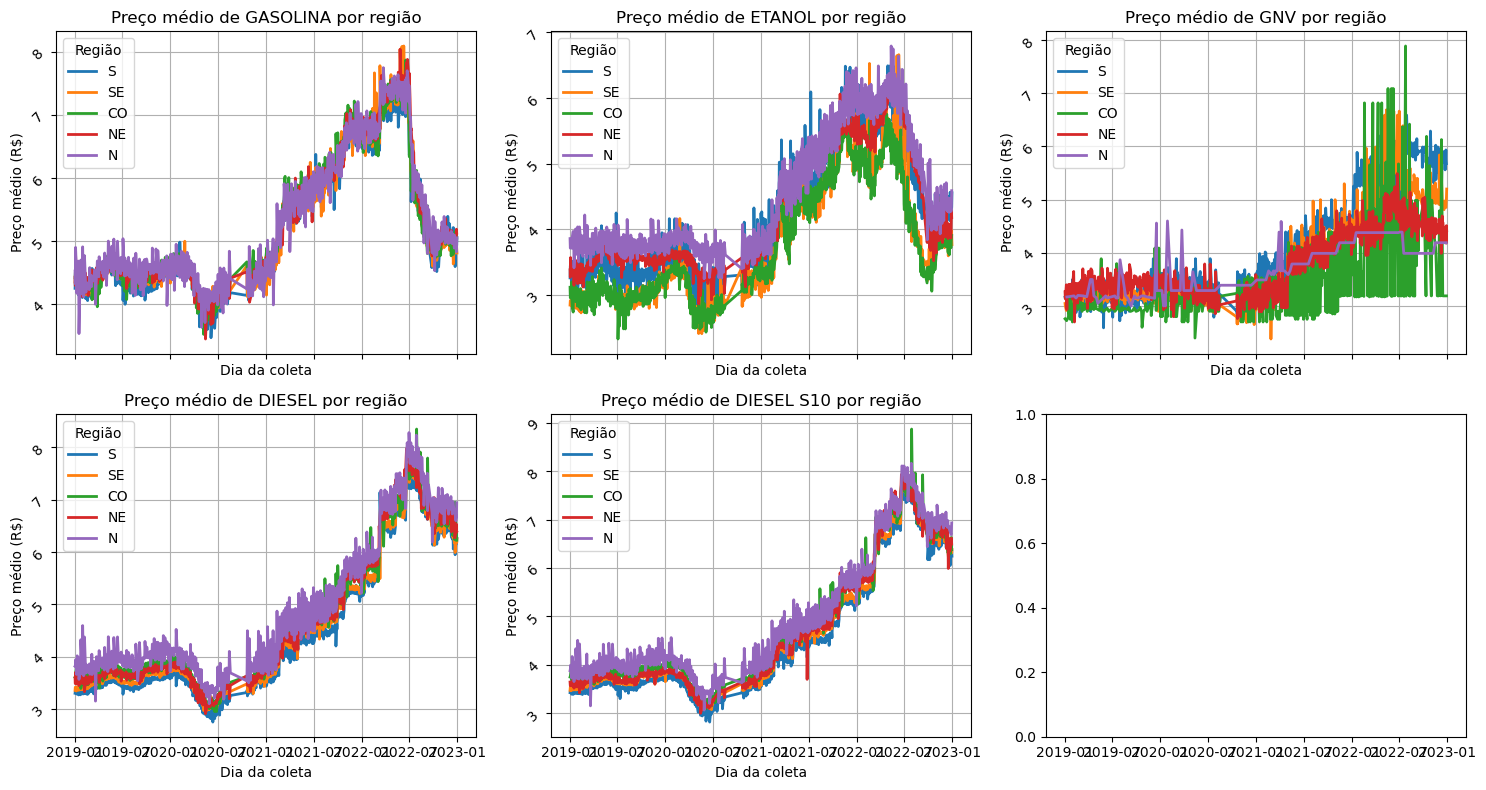

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt

# Supondo que você já tenha carregado seu DataFrame df

# Lista de produtos
produtos = ['GASOLINA', 'ETANOL', 'GNV', 'DIESEL', 'DIESEL S10']

# Configuração do layout dos subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 8), sharex=True)

# Loop sobre os produtos
for i, tipo in enumerate(produtos):
    # Calcula a posição do subplot
    row = i // 3
    col = i % 3

    # Seleciona o subplot atual
    plt.sca(axs[row, col])

    for regiao in ['S', 'SE', 'CO', 'NE', 'N']:
        # Cria um dataframe temporário com os dados do tipo de combustível selecionado e da região atual
        df_temp = df.loc[(df['Produto'] == tipo) & (df['Regiao - Sigla'] == regiao)]

        date_format = '%d/%m/%Y'

        date_time = [dt.strptime(date, date_format) for date in df_temp['Data da Coleta']]

        # Calcula o valor médio do combustível por dia
        meanval = [df_temp.loc[df_temp['Data da Coleta'] == date]['Valor de Venda'].mean() for date in df_temp['Data da Coleta'].unique()]

        # Cria um vetor com os dias únicos
        date_time_unique = [dt.strptime(date, date_format) for date in df_temp['Data da Coleta'].unique()]

        # Cria um dataframe contendo os dias únicos e os valores médios, colocando os dias em ordem crescente
        df_new = pd.DataFrame({'Data da Coleta': date_time_unique, 'Valor de Venda': meanval})
        df_new = df_new.sort_values(by=['Data da Coleta'])
        # Coloca a data como index
        df_new = df_new.set_index('Data da Coleta')

        plt.plot(df_new, lw=2, label=regiao)

    plt.legend(title='Região')
    plt.grid()
    plt.title(f'Preço médio de {tipo} por região')
    plt.xlabel('Dia da coleta')
    plt.ylabel('Preço médio (R$)')
    plt.yticks(rotation=45)

# Ajusta o layout para evitar sobreposições
plt.tight_layout()

# Exibe a figura
plt.show()
